<h2><strong>UDP traffic</strong></h2>
<h3>Prediction by Multiple Linear Regression for Temperature and Utilization of CPU</h3>
<p> The aim of the test is to predict Utilization and Temperature of CPU, having the data of Network devices №1-3</p>

At the beginning let's upload some classes and create a database.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# create a database 
dataUDP2 = pd.DataFrame([[1, 1500, 600, 50, 38], [1, 1500, 650, 55, 45], [1, 1500, 700, 60, 52], [1, 1500, 750, 65, 60], [1, 1500, 900, 70, 67], [2, 2600, 750, 35, 30], [2, 2600, 800, 40, 31], [2, 2600, 850, 45, 32], [2, 2600, 900, 50, 33], [2, 2600, 600, 30, 28], [3, 2000, 600, 40, 54]], columns=['Device', 'Clock frequency', 'UDP Throughput', 'Utilization of CPU', 'Temperature of CPU'])
dataUDP2.to_csv('dataUDP2.csv', index=False)
# upload a database 
df2 = pd.read_csv('dataUDP2.csv')
df2.head(11)

,Device,Clock frequency,UDP Throughput,Utilization of CPU,Temperature of CPU
0,1,1500,600,50,38
1,1,1500,650,55,45
2,1,1500,700,60,52
3,1,1500,750,65,60
4,1,1500,900,70,67
5,2,2600,750,35,30
6,2,2600,800,40,31
7,2,2600,850,45,32
8,2,2600,900,50,33
9,2,2600,600,30,28


In [2]:
df2.describe()

,Device,Clock frequency,UDP Throughput,Utilization of CPU,Temperature of CPU
count,11.000000,11.000000,11.000000,11.000000,11.000000
mean,1.636364,2045.454545,736.363636,49.090909,42.727273
std,0.674200,550.206573,116.384941,12.613124,13.616835
min,1.000000,1500.000000,600.000000,30.000000,28.000000
25%,1.000000,1500.000000,625.000000,40.000000,31.500000
50%,2.000000,2000.000000,750.000000,50.000000,38.000000
75%,2.000000,2600.000000,825.000000,57.500000,53.000000
max,3.000000,2600.000000,900.000000,70.000000,67.000000


Carry out a correlation analysis by heatmap:

<AxesSubplot:>

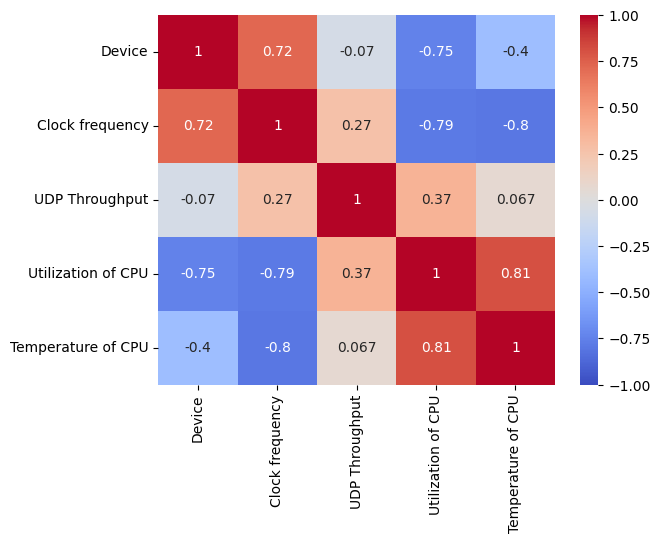

In [3]:
import seaborn as sns
sns.heatmap(df2.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

<p>It is seen that values of Utilization and Temperature of CPU  have a strong correlation and high reverse correlation to Clock frequency.</p>
<p>But, the only known value is UDP Throughput, that means that's correlation is more important. From the heat map it is seen that Utilization has much stronger correlation with Throughput than Temperature.</p>
<ul>Next step is to create equations for a system of linear regressions:
    <li><i>u = a<sub>0</sub> + a<sub>1</sub>*x<sub>1</sub> + a<sub>2</sub>*x<sub>2</sub> + a<sub>3</sub>*t</i></li>
    <li><i>t = a<sub>4</sub> + a<sub>5</sub>*x<sub>1</sub> + a<sub>6</sub>*x<sub>2</sub> + a<sub>7</sub>*u</i></li>
    Where u - dependent variable of CPU Utilization, t - dependent variable of CPU Temperature, X<sub>1</sub> - independent variable of Clock frequency, X<sub>2</sub> - independent variable of UDP Throughput. 
</ul>

<p> Let's compute coefficients of regression:<i> a<sub>0</sub> + a<sub>1</sub> + a<sub>2</sub>...</i></p>


In [4]:
x2 = df2[['Clock frequency', 'UDP Throughput', 'Temperature of CPU']]
y2 = df2['Utilization of CPU']
regressor_UP = LinearRegression().fit(x2, y2)
coeff_df2_UP = pd.DataFrame(regressor_UP.coef_, x2.columns, columns=['a1-a3'])
Intercept_df2_UP = pd.DataFrame(regressor_UP.intercept_, ['Intercept coef.'], columns=['a0'])
Intercept_df2_UP

,a0
Intercept coef.,42.813023


In [10]:
coeff_df2_UP

,a1-a3
Clock frequency,-0.021342
UDP Throughput,0.066491
Temperature of CPU,0.022710


Now, as coefficients have been computed it is necessary to verify our model by the determination rate R<sup>2</sup>

In [5]:
r_2_UP = regressor_UP.score(x2, y2)
print(r_2_UP)

0.975770546770434


Compute coefficients of regression: <i> a<sub>4</sub> + a<sub>5</sub> + a<sub>6</sub>... </i></p>

In [7]:
x3 = df2[['Clock frequency', 'UDP Throughput', 'Utilization of CPU']]
y3 = df2['Temperature of CPU']
regressor_t = LinearRegression().fit(x3, y3)
coeff_df2_t = pd.DataFrame(regressor_t.coef_, x3.columns, columns=['a5-a7'])
Intercept_df2_t = pd.DataFrame(regressor_t.intercept_, ['Intercept coef.'], columns=['a4'])
Intercept_df2_t

,a4
Intercept coef.,48.083102


In [8]:
coeff_df2_t

,a5-a7
Clock frequency,-0.015331
UDP Throughput,0.015494
Utilization of CPU,0.297276


In [9]:
r_2_t = regressor_t.score(x3, y3)
print(r_2_t)

0.7278648193590846


Having solved a system of equations and release u from dependence on t, the following system was gotten:
<ul>
    <li><big> $u = \frac{a_{3}a_{4} + a_{0}+x_{1}(a_{3}a_{5} + a_{1}) + x_{2}(a_{3}a_{6} + a_{2})} {1 - a_{3}a_{7}}$</big></li>
    <li><big> $t = a_{4} + a_{5}x_{1} + a_{6}x_{2} + a_{7}u$</big></li>
</ul>
<p>
 

Set the values of independent variables:

In [10]:
X1 = Clock_frequency = 1700
throughput = []
for i in range(50, 550, 50):
    throughput.append(i)



Assign for each coefficient it's value:

In [11]:
(a0, a1, a2, a3, a4, a5, a6, a7) = (regressor_UP.intercept_, regressor_UP.coef_[0], regressor_UP.coef_[1], regressor_UP.coef_[2], regressor_t.intercept_, regressor_t.coef_[0], regressor_t.coef_[1], regressor_t.coef_[2])
print(a0, a1, a2, a3, a4, a5, a6, a7)

42.8130231646285 -0.021342010815788896 0.06649116248627945 0.02270972852228337 48.083102493074804 -0.015330871037242235 0.01549399815327792 0.29727608494921526


Compute a predicted Utilization:

In [12]:
u_pred_UP = []
for X2 in throughput:
    U = (a3 * a4 + a0 + X1 * (a3 * a5 + a1) + X2 * (a3 * a6 + a2))/(1 - a3 * a7) 
    u_pred_UP.append(U)
print(u_pred_UP)



[10.444348885544343, 13.809216655916305, 17.174084426288267, 20.53895219666023, 23.90381996703219, 27.268687737404154, 30.633555507776116, 33.99842327814808, 37.36329104852004, 40.728158818892005]


Compute a predicted Temperature: 

In [13]:
t_pred_t = []
for X2, U in zip(throughput, u_pred_UP):
    t = a4 + a5 * X1 + a6 * X2 + a7 * U
    t_pred_t.append(t)
print(t_pred_t)

[25.90017678396522, 27.67517140877709, 29.450166033588957, 31.225160658400824, 33.00015528321269, 34.77514990802456, 36.55014453283643, 38.3251391576483, 40.10013378246016, 41.87512840727204]


Create a table:

In [14]:
dic = {'Clock frequency': 1700, 'UDP Throughput' : throughput, 'Utilization of CPU' : [int(u) for u in np.round(u_pred_UP)], 'Temperature of CPU' : [int(t) for t in np.round(t_pred_t)]}
df3 = pd.DataFrame(dic)
df3

,Clock frequency,UDP Throughput,Utilization of CPU,Temperature of CPU
0,1700,50,10,26
1,1700,100,14,28
2,1700,150,17,29
3,1700,200,21,31
4,1700,250,24,33
5,1700,300,27,35
6,1700,350,31,37
7,1700,400,34,38
8,1700,450,37,40
9,1700,500,41,42


<p><strong>Results:</strong> The table with predicted values of Utilization and Temperature of CPU is created.</p>